## Predicting Bourke Street Mall South

In [1]:
#Libraries
import pandas as pd
import numpy as np
import time
import datetime
import matplotlib.pyplot as plt
import scipy 
import seaborn as sns
from scipy.stats import skew
from sklearn import svm, neighbors, gaussian_process


In [2]:
#Load in the data

df = pd.read_csv("IndDepVarUpdate.csv")
df

,Day Index,date,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),SouthernCrossCount,VictoriaPointCount,FlindersStSparkLaneCount,CollinsPlaceNorth,BourkeStMallSouth
0,0,1/1/15,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,2592.0,2813.0,4086.0,1711.0,21217.0
1,1,2/1/15,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,1848.0,4648.0,1952.0,2925.0,25256.0
2,2,3/1/15,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,1451.0,1428.0,1628.0,1306.0,17648.0
3,3,4/1/15,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,1047.0,1347.0,2063.0,1547.0,24428.0
4,4,5/1/15,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,3416.0,11483.0,2921.0,7781.0,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,27/8/21,0,2021,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN,NaN,NaN,NaN,NaN
2431,2431,28/8/21,0,2021,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN,NaN,NaN,NaN,NaN
2432,2432,29/8/21,0,2021,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN,NaN,NaN,NaN,NaN
2433,2433,30/8/21,0,2021,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN,NaN,NaN,NaN,NaN


In [3]:
#Get rid of columns not relevant for prediction or EDA

df = df.drop(columns = ["date", "SouthernCrossCount", "VictoriaPointCount", "FlindersStSparkLaneCount", "CollinsPlaceNorth"])

In [4]:
df

,Day Index,Public Holiday?,Year,Month,Day,Day of the Year,Day of the Week,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,0,1,2015,1,1,1,Thursday,5,13.3,26.9,23.600000,0.000,21217.0
1,1,0,2015,1,2,2,Friday,6,15.4,38.8,26.800000,0.000,25256.0
2,2,0,2015,1,3,3,Saturday,7,20.0,38.2,26.500000,0.000,17648.0
3,3,0,2015,1,4,4,Sunday,1,16.3,21.4,25.200000,4.200,24428.0
4,4,0,2015,1,5,5,Monday,2,15.0,22.0,30.700000,0.000,28503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,0,2021,8,27,239,Friday,6,6.1,14.5,12.161574,3.488,NaN
2431,2431,0,2021,8,28,240,Saturday,7,8.8,20.7,12.163382,1.768,NaN
2432,2432,0,2021,8,29,241,Sunday,1,8.5,17.6,12.165101,2.032,NaN
2433,2433,0,2021,8,30,242,Monday,2,9.2,19.3,12.166721,0.320,NaN


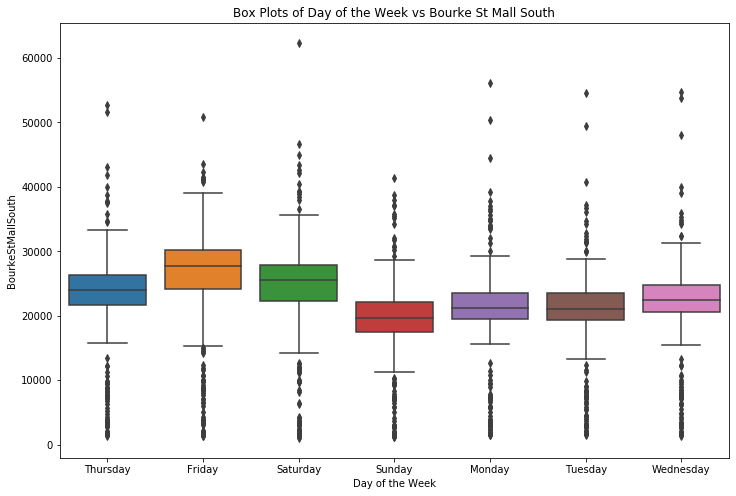

In [5]:
#Do some EDA for this sensor location


plt.figure(figsize=(12,8))
sns.boxplot(x= 'Day of the Week', y= 'BourkeStMallSouth',data = df)
plt.title('Box Plots of Day of the Week vs Bourke St Mall South')
plt.show()

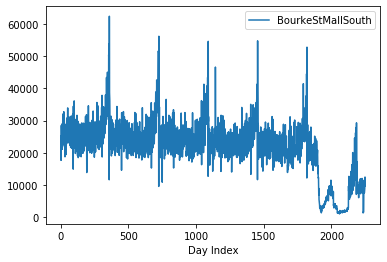

In [6]:

df.plot("Day Index", 'BourkeStMallSouth')

In [7]:
#Get rid of Columns not relevant for prediction

df = df.drop(columns = ["Day Index", "Day", "Day of the Week"])

In [8]:
df

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,2015,1,1,5,13.3,26.9,23.600000,0.000,21217.0
1,0,2015,1,2,6,15.4,38.8,26.800000,0.000,25256.0
2,0,2015,1,3,7,20.0,38.2,26.500000,0.000,17648.0
3,0,2015,1,4,1,16.3,21.4,25.200000,4.200,24428.0
4,0,2015,1,5,2,15.0,22.0,30.700000,0.000,28503.0
...,...,...,...,...,...,...,...,...,...,...
2430,0,2021,8,239,6,6.1,14.5,12.161574,3.488,NaN
2431,0,2021,8,240,7,8.8,20.7,12.163382,1.768,NaN
2432,0,2021,8,241,1,8.5,17.6,12.165101,2.032,NaN
2433,0,2021,8,242,2,9.2,19.3,12.166721,0.320,NaN


In [9]:
#Drop rows with NaN
dfdropless = df
df = df.dropna()

In [10]:
dfdropless.shape

(2435, 10)

In [11]:
df

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,2015,1,1,5,13.3,26.9,23.6,0.0,21217.0
1,0,2015,1,2,6,15.4,38.8,26.8,0.0,25256.0
2,0,2015,1,3,7,20.0,38.2,26.5,0.0,17648.0
3,0,2015,1,4,1,16.3,21.4,25.2,4.2,24428.0
4,0,2015,1,5,2,15.0,22.0,30.7,0.0,28503.0
...,...,...,...,...,...,...,...,...,...,...
2246,0,2021,2,55,4,13.0,20.2,23.3,0.0,8482.0
2247,0,2021,2,56,5,11.3,24.3,18.9,0.0,8882.0
2248,0,2021,2,57,6,13.3,19.7,15.7,0.4,10074.0
2249,0,2021,2,58,7,11.3,18.6,11.8,0.0,12477.0


In [12]:
#Replace Year with values from 0 to 6

df = df.replace(2015, 0)
df = df.replace(2016, 1)
df = df.replace(2017, 2)
df = df.replace(2018, 3)
df = df.replace(2019, 4)
df = df.replace(2020, 5)
df = df.replace(2021, 6)
df

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,0,1,1,5,13.3,26.9,23.6,0.0,21217.0
1,0,0,1,2,6,15.4,38.8,26.8,0.0,25256.0
2,0,0,1,3,7,20.0,38.2,26.5,0.0,17648.0
3,0,0,1,4,1,16.3,21.4,25.2,4.2,24428.0
4,0,0,1,5,2,15.0,22.0,30.7,0.0,28503.0
...,...,...,...,...,...,...,...,...,...,...
2246,0,6,2,55,4,13.0,20.2,23.3,0.0,8482.0
2247,0,6,2,56,5,11.3,24.3,18.9,0.0,8882.0
2248,0,6,2,57,6,13.3,19.7,15.7,0.4,10074.0
2249,0,6,2,58,7,11.3,18.6,11.8,0.0,12477.0


In [13]:
#Split train and test data

dropdf = df.drop(columns = "BourkeStMallSouth")
dropdf

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
0,1,0,1,1,5,13.3,26.9,23.6,0.0
1,0,0,1,2,6,15.4,38.8,26.8,0.0
2,0,0,1,3,7,20.0,38.2,26.5,0.0
3,0,0,1,4,1,16.3,21.4,25.2,4.2
4,0,0,1,5,2,15.0,22.0,30.7,0.0
...,...,...,...,...,...,...,...,...,...
2246,0,6,2,55,4,13.0,20.2,23.3,0.0
2247,0,6,2,56,5,11.3,24.3,18.9,0.0
2248,0,6,2,57,6,13.3,19.7,15.7,0.4
2249,0,6,2,58,7,11.3,18.6,11.8,0.0


In [14]:
Ydf = df["BourkeStMallSouth"]
Ydf

0       21217.0
1       25256.0
2       17648.0
3       24428.0
4       28503.0
         ...   
2246     8482.0
2247     8882.0
2248    10074.0
2249    12477.0
2250     9754.0
Name: BourkeStMallSouth, Length: 2241, dtype: float64

In [15]:


train_x = dropdf[:2213]
train_y = Ydf[:2213]

test_x = dropdf[2213:]
test_y = Ydf[2213:]

### Use ML algorithms and find out which one is the best

In [16]:
#SVM

SVRML = svm.SVR()

SVRML.fit(train_x, train_y)
SVRML
SVM = SVRML.predict(test_x)
SVM

array([22783.92944635, 22784.1257068 , 22784.74233805, 22783.38544939,
       22782.31321747, 22781.63381323, 22780.24710445, 22779.41964042,
       22780.52902052, 22780.34981035, 22778.82893872, 22777.82316976,
       22777.09905829, 22775.95484598, 22775.91065279, 22775.67042536,
       22775.51221011, 22775.21841224, 22774.65046029, 22772.27215574,
       22770.39649585, 22770.57059996, 22770.24426054, 22769.83080411,
       22768.89525716, 22767.76398989, 22766.68179952, 22767.33280917])

In [17]:
#KNN

KNN = neighbors.KNeighborsRegressor()

KNN.fit(train_x, train_y)
KNN
KNN = KNN.predict(test_x)
KNN

array([19534. , 19071.6, 23959.4, 21547.2, 21746.2, 23079.4, 20460.8,
       21397. , 21175.8, 21512.4, 22458.4, 23870. , 25928.6, 24119.6,
       23433.4, 19773. , 20577.6, 23457.8, 23251.8, 24665.2, 21170.2,
       23311.8, 25049.8, 25049.8, 25549.4, 24854.6, 24082. , 20957.4])

In [18]:
#GPR (doesn't work)
GPR = gaussian_process.GaussianProcessRegressor().fit(train_x, train_y).predict(test_x)

GPR

array([3.33367148e-01, 2.13679328e+01, 8.84343355e+00, 1.29791979e-08,
       1.85393733e-02, 5.27998554e-01, 2.75269209e-05, 4.07183642e-03,
       1.47694712e-01, 4.93292990e-02, 7.42679134e-04, 1.87240243e-05,
       2.15236945e-01, 6.97482753e-01, 1.32949919e+00, 7.81655800e+00,
       3.24416526e+00, 1.34473594e-02, 1.92593712e-05, 6.32947100e-07,
       7.35257125e+00, 9.48382661e-01, 4.39503268e-01, 2.08445798e+00,
       1.37120059e-03, 2.75134891e+02, 7.10327661e+02, 7.06274508e-01])

In [19]:
#Decision tree has more variation albeit quite wide and is slightly more realistic.

from sklearn import tree

DT = tree.DecisionTreeRegressor(random_state = 0)

DTFIT = DT.fit(train_x, train_y)
DT = DTFIT.predict(test_x)
DT

array([ 9462.,  9462.,  9973.,  9462., 11043., 11043.,  9462.,  9462.,
        9973.,  9943.,  7405., 11983., 11983.,  9462.,  9462.,  9462.,
        9434.,  9434.,  6062., 11043.,  7512.,  9462.,  9462.,  9462.,
        9462., 11043., 11043.,  9462.])

In [20]:
#MLP has quite a wide range but it still just slowly goes down in values

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 0).fit(train_x, train_y)
MLP = MLP.predict(test_x)
MLP

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


array([10897.25012301, 12783.75620083, 15547.82630413, 14919.91250344,
       14647.1987647 , 14671.38058593, 12173.21685514, 11808.22824588,
       15110.5415711 , 16732.39006814, 15945.32360068, 15617.47235662,
       14450.44483876, 12848.37682538, 14662.04583392, 16142.35753751,
       16956.20736241, 18006.97709866, 18345.18366209, 15354.5479957 ,
       12125.02126382, 13894.28843436, 13995.72907786, 14613.84101954,
       14535.59709558, 13796.65856051, 12738.95506226, 15002.81207802])

In [21]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor as RF

RF = RF(random_state = 2).fit(train_x, train_y).predict(test_x)
RF

array([ 9489.99,  9553.9 , 10062.8 ,  9453.32,  9583.98, 10432.96,
        9408.56,  9413.37,  9966.15,  9354.64,  8447.12,  9864.43,
       11196.29,  9559.45,  9446.49,  8687.5 ,  9331.37,  8581.22,
        8598.78, 10172.79,  8544.17,  9173.4 ,  9719.8 ,  9904.33,
       10217.64, 10672.25, 11098.35,  9505.75])

In [22]:
test_y

2223     7854.0
2224     8312.0
2225     8880.0
2226     8760.0
2227     8443.0
2228    12031.0
2229     9277.0
2230     7456.0
2231     8488.0
2232     8147.0
2233     8393.0
2234     9652.0
2235     1336.0
2236     1552.0
2237     1661.0
2238     1622.0
2239     1633.0
2240     7571.0
2241     8563.0
2242    11488.0
2243     9224.0
2244     7543.0
2245     7950.0
2246     8482.0
2247     8882.0
2248    10074.0
2249    12477.0
2250     9754.0
Name: BourkeStMallSouth, dtype: float64

In [23]:
#Spearman with ML programs

from scipy import stats 



print('Random Forrest:     ', stats.spearmanr(a = RF, b =  test_y))


print('Decision Tree:      ', stats.spearmanr(DT, test_y))

print('MLP:                ', stats.spearmanr(MLP, test_y))

print('K Nearest Neighbour ', stats.spearmanr(KNN, test_y))

print('SVM                 ', stats.spearmanr(SVM, test_y))

print('Gaussian:           ', stats.spearmanr(GPR, test_y))



Random Forrest:      SpearmanrResult(correlation=0.3957307060755336, pvalue=0.037114910045114156)
Decision Tree:       SpearmanrResult(correlation=0.3331321018058091, pvalue=0.08322483123310015)
MLP:                 SpearmanrResult(correlation=-0.03721948549534756, pvalue=0.8508510986875693)
K Nearest Neighbour  SpearmanrResult(correlation=0.1119474487012848, pvalue=0.5706119586034326)
SVM                  SpearmanrResult(correlation=-0.1992337164750958, pvalue=0.3094310529928798)
Gaussian:            SpearmanrResult(correlation=-0.08483853311439518, pvalue=0.6677549486123326)


#### The best correlation is Random Forrest so use other metrics to help calculate/tune

In [24]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, max_error
print('R2          ', r2_score(test_y, RF))
print('Mean Absolute', mean_absolute_error(test_y, RF))
print('Max Error    ', max_error(test_y, RF))


R2           -0.34429369318144687
Mean Absolute 2299.134285714286
Max Error     9860.29


#### The February data set is not good for getting good values as there was a 5 day lock down.  To mitigate this lets take out the lockdown values

In [25]:
test_x1 = dropdf[2213:]
test_x1 = test_x1.drop(test_x1.index[12:17])
test_y1 = Ydf[2213:]
test_y1 = test_y1.drop(test_y1.index[12:17])

In [26]:
test_y1

2223     7854.0
2224     8312.0
2225     8880.0
2226     8760.0
2227     8443.0
2228    12031.0
2229     9277.0
2230     7456.0
2231     8488.0
2232     8147.0
2233     8393.0
2234     9652.0
2240     7571.0
2241     8563.0
2242    11488.0
2243     9224.0
2244     7543.0
2245     7950.0
2246     8482.0
2247     8882.0
2248    10074.0
2249    12477.0
2250     9754.0
Name: BourkeStMallSouth, dtype: float64

In [27]:
test_y1.shape

(23,)

In [28]:
#SVM

SVRML = svm.SVR()

SVRML.fit(train_x, train_y)
SVRML
SVM = SVRML.predict(test_x1)

In [29]:
#KNN

KNN = neighbors.KNeighborsRegressor()

KNN.fit(train_x, train_y)
KNN
KNN = KNN.predict(test_x1)

In [30]:
#GPR (doesn't work)
GPR = gaussian_process.GaussianProcessRegressor().fit(train_x, train_y).predict(test_x1)


In [31]:
#Decision tree has more variation albeit quite wide and is slightly more realistic.

from sklearn import tree

DT = tree.DecisionTreeRegressor(random_state = 0)

DTFIT = DT.fit(train_x, train_y)
DT = DTFIT.predict(test_x1)


In [32]:
#MLP has quite a wide range but it still just slowly goes down in values

from sklearn.neural_network import MLPRegressor

MLP = MLPRegressor(random_state = 0).fit(train_x, train_y)
MLP = MLP.predict(test_x1)

/Users/jason/opt/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [41]:
#Random Forest

from sklearn.ensemble import RandomForestRegressor as RF

RF1 = RF(random_state = 2).fit(train_x, train_y)
RF1 = RF1.predict(test_x1)


In [34]:
import pickle
# save the model to disk
BourkeSt = 'BourkeStModel.sav'
pickle.dump(RF1, open(BourkeSt, 'wb'))

In [42]:
RF1

array([ 9489.99,  9553.9 , 10062.8 ,  9453.32,  9583.98, 10432.96,
        9408.56,  9413.37,  9966.15,  9354.64,  8447.12,  9864.43,
        8581.22,  8598.78, 10172.79,  8544.17,  9173.4 ,  9719.8 ,
        9904.33, 10217.64, 10672.25, 11098.35,  9505.75])

In [43]:
test_x1

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2223,0,6,2,32,2,13.4,20.3,10.5,0.0
2224,0,6,2,33,3,14.5,19.3,19.9,0.0
2225,0,6,2,34,4,13.7,25.9,28.4,0.0
2226,0,6,2,35,5,13.5,30.6,18.6,0.0
2227,0,6,2,36,6,17.3,29.8,12.1,0.4
2228,0,6,2,37,7,16.9,25.4,15.1,1.6
2229,0,6,2,38,1,14.7,19.2,15.7,1.8
2230,0,6,2,39,2,15.0,19.2,12.8,0.4
2231,0,6,2,40,3,12.0,25.2,27.6,0.0
2232,0,6,2,41,4,13.8,31.5,27.0,0.0


In [44]:


print('Random Forrest:     ', stats.spearmanr(a = RF1, b =  test_y1))


print('Decision Tree:      ', stats.spearmanr(DT, test_y1))

print('MLP:                ', stats.spearmanr(MLP, test_y1))

print('K Nearest Neighbour ', stats.spearmanr(KNN, test_y1))

print('SVM                 ', stats.spearmanr(SVM, test_y1))

print('Gaussian:           ', stats.spearmanr(GPR, test_y1))

Random Forrest:      SpearmanrResult(correlation=0.5869565217391304, pvalue=0.0032369399193235785)
Decision Tree:       SpearmanrResult(correlation=0.49358157648731704, pvalue=0.016688415921092513)
MLP:                 SpearmanrResult(correlation=0.043478260869565216, pvalue=0.8438440075057312)
K Nearest Neighbour  SpearmanrResult(correlation=0.22288115333249064, pvalue=0.306675186008219)
SVM                  SpearmanrResult(correlation=-0.3181818181818182, pvalue=0.13897508098949363)
Gaussian:            SpearmanrResult(correlation=0.07509881422924902, pvalue=0.7334365351453347)


####  As assumed.  The random forrest result is much higher this time when taking out the lockdown values

In [45]:
print('R2          ', r2_score(test_y1, RF1))
print('Mean Absolute', mean_absolute_error(test_y1, RF1))
print('Max Error    ', max_error(test_y1, RF1))



R2           0.21139377505991053
Mean Absolute 1041.6808695652173
Max Error     1957.3700000000008


In [46]:
dropdf.shape

(2241, 9)

In [47]:
dfdropless.shape

(2435, 10)

In [48]:
dfdropless.shape

(2435, 10)

In [49]:
x_predict = dfdropless[2251:]
x_predict = x_predict.drop(columns = ["BourkeStMallSouth"])
x_predict

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres)
2251,0,2021,3,60,2,13.8,21.7,17.500288,1.672
2252,0,2021,3,61,3,13.3,18.1,17.023478,0.184
2253,0,2021,3,62,4,14.2,17.7,16.966345,0.016
2254,0,2021,3,63,5,13.6,21.4,16.837059,1.024
2255,0,2021,3,64,6,15.0,18.0,16.607296,1.464
...,...,...,...,...,...,...,...,...,...
2430,0,2021,8,239,6,6.1,14.5,12.161574,3.488
2431,0,2021,8,240,7,8.8,20.7,12.163382,1.768
2432,0,2021,8,241,1,8.5,17.6,12.165101,2.032
2433,0,2021,8,242,2,9.2,19.3,12.166721,0.320


In [50]:
y_predict = RF(random_state = 2).fit(train_x, train_y).predict(x_predict)
y_predict

array([ 9455.47,  9661.67,  9780.36,  9930.92, 10640.  , 11130.28,
        9460.36,  9386.57,  9674.65,  9917.1 , 10022.41, 10119.02,
       10338.34,  9741.11,  9757.67,  9965.21,  9509.98,  9853.23,
       10406.54, 10984.13,  8972.65,  8758.16,  8625.26,  8170.58,
        6185.55,  4888.13,  4644.4 ,  4419.13,  3812.23,  3442.32,
        3238.24,  3209.72,  2439.93,  2499.81,  2305.62,  2392.97,
        3083.61,  3201.73,  3049.31,  3157.61,  3240.25,  2894.16,
        3009.87,  3033.82,  3096.4 ,  3187.18,  3290.76,  3215.84,
        2918.09,  3078.86,  3101.49,  3122.62,  3233.04,  3229.07,
        3207.58,  2176.5 ,  3164.25,  3226.82,  3445.51,  3512.46,
        3413.73,  3739.9 ,  3592.95,  3904.57,  3905.92,  4068.43,
        4294.17,  4348.34,  4377.  ,  4311.54,  4193.11,  4249.25,
        4454.5 ,  4503.65,  4642.15,  5250.95,  5395.82,  5563.16,
        5551.83,  5841.13,  5965.84,  6265.02,  6733.64,  5916.05,
        5992.55,  6079.19,  6109.07,  6106.2 ,  6518.97,  7878

In [51]:
x_predict["BourkeStMallSouth"] = y_predict
x_predict

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
2251,0,2021,3,60,2,13.8,21.7,17.500288,1.672,9455.47
2252,0,2021,3,61,3,13.3,18.1,17.023478,0.184,9661.67
2253,0,2021,3,62,4,14.2,17.7,16.966345,0.016,9780.36
2254,0,2021,3,63,5,13.6,21.4,16.837059,1.024,9930.92
2255,0,2021,3,64,6,15.0,18.0,16.607296,1.464,10640.00
...,...,...,...,...,...,...,...,...,...,...
2430,0,2021,8,239,6,6.1,14.5,12.161574,3.488,1704.02
2431,0,2021,8,240,7,8.8,20.7,12.163382,1.768,1676.95
2432,0,2021,8,241,1,8.5,17.6,12.165101,2.032,1660.07
2433,0,2021,8,242,2,9.2,19.3,12.166721,0.320,1667.18


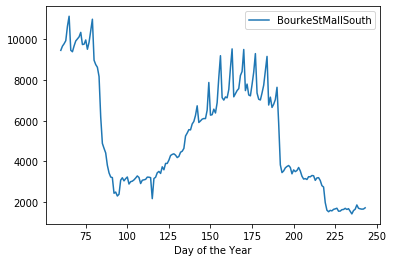

In [52]:
x_predict.plot('Day of the Year','BourkeStMallSouth')


In [53]:
df

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,0,1,1,5,13.3,26.9,23.6,0.0,21217.0
1,0,0,1,2,6,15.4,38.8,26.8,0.0,25256.0
2,0,0,1,3,7,20.0,38.2,26.5,0.0,17648.0
3,0,0,1,4,1,16.3,21.4,25.2,4.2,24428.0
4,0,0,1,5,2,15.0,22.0,30.7,0.0,28503.0
...,...,...,...,...,...,...,...,...,...,...
2246,0,6,2,55,4,13.0,20.2,23.3,0.0,8482.0
2247,0,6,2,56,5,11.3,24.3,18.9,0.0,8882.0
2248,0,6,2,57,6,13.3,19.7,15.7,0.4,10074.0
2249,0,6,2,58,7,11.3,18.6,11.8,0.0,12477.0


In [54]:
pdjoin = pd.concat([df, x_predict])
pdjoin

,Public Holiday?,Year,Month,Day of the Year,DayOfWeekNumeric,Min,Max,Daily global solar exposure (MJ/m*m),Rainfall amount (millimetres),BourkeStMallSouth
0,1,0,1,1,5,13.3,26.9,23.600000,0.000,21217.00
1,0,0,1,2,6,15.4,38.8,26.800000,0.000,25256.00
2,0,0,1,3,7,20.0,38.2,26.500000,0.000,17648.00
3,0,0,1,4,1,16.3,21.4,25.200000,4.200,24428.00
4,0,0,1,5,2,15.0,22.0,30.700000,0.000,28503.00
...,...,...,...,...,...,...,...,...,...,...
2430,0,2021,8,239,6,6.1,14.5,12.161574,3.488,1704.02
2431,0,2021,8,240,7,8.8,20.7,12.163382,1.768,1676.95
2432,0,2021,8,241,1,8.5,17.6,12.165101,2.032,1660.07
2433,0,2021,8,242,2,9.2,19.3,12.166721,0.320,1667.18


In [56]:
x_predict.scatter('Day of the Year','BourkeStMallSouth')

AttributeError: 'DataFrame' object has no attribute 'scatter'

<function matplotlib.pyplot.show(*args, **kw)>

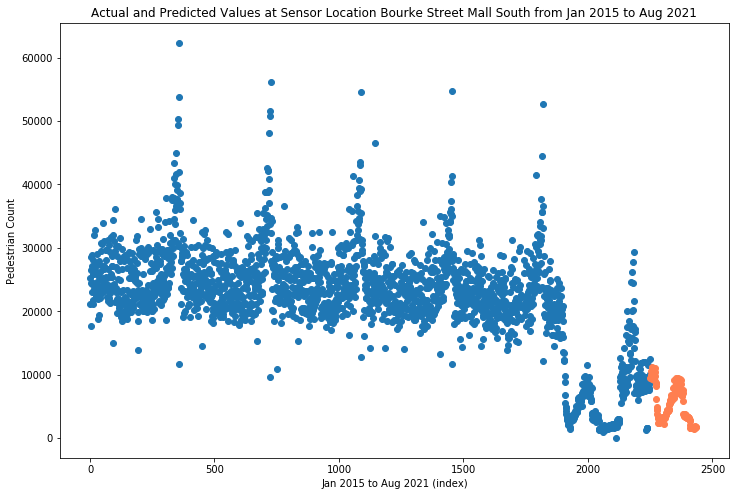

In [57]:
plt.figure(figsize=(12,8))

plt.scatter(df.index, df['BourkeStMallSouth'])

plt.scatter(x_predict.index, x_predict['BourkeStMallSouth'], c='coral')

plt.title('Actual and Predicted Values at Sensor Location Bourke Street Mall South from Jan 2015 to Aug 2021')
plt.xlabel('Jan 2015 to Aug 2021 (index)')
plt.ylabel('Pedestrian Count')
plt.show

In [59]:
pdjoin.to_csv("BourkeStJointPrediction.csv")

In [60]:
x_predict.to_csv("BourkeStPredictionOnly.csv")